In [2]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 2.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import control
import numpy as np
s = control.TransferFunction.s
wp1 = 2*np.pi*10e6
A0 = 1e4
t = np.linspace(0, 100e-12 , num =5000)
AOL = A0 /(1 + s/wp1)
ACL = AOL /(1+ AOL )
t, y = control.step_response(ACL , t)

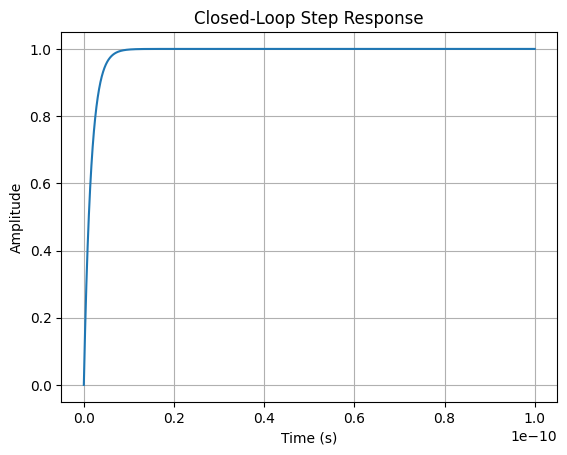

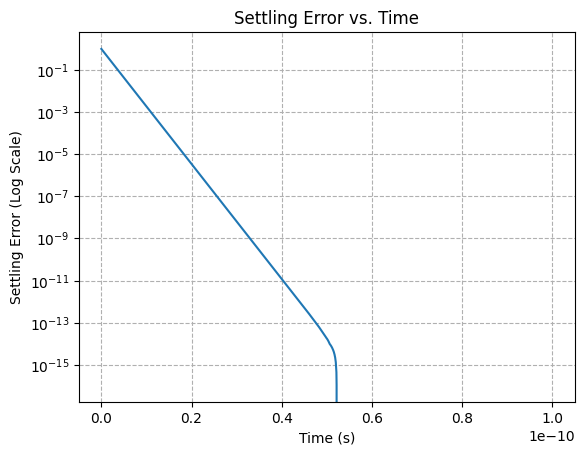

[3.680736147229446e-12, 7.341468293658732e-12, 1.1002200440088019e-11]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control

wp1 = 2 * np.pi * 10e6 
A0 = 1e4 
t = np.linspace(0, 100e-12, num=5000)
s = control.TransferFunction.s
AOL = A0 / (1 + s/wp1)
ACL = control.feedback(AOL, 1)
t, y = control.step_response(ACL, t)

# Plot the step response
plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Closed-Loop Step Response')
plt.grid(True)
plt.show()

# Calculate and plot the settling error vs time in log scale
final_value = y[-1]
error = np.abs(1 - y / final_value)
plt.figure()
plt.semilogy(t, error)
plt.xlabel('Time (s)')
plt.ylabel('Settling Error (Log Scale)')
plt.title('Settling Error vs. Time')
plt.grid(True, which="both", ls="--")
plt.show()


settling_range = [0.10, 0.01, 0.001] 
settling_times = []

for e in settling_range:
    settling_time_index = np.where(error < e)[0]
    settling_times.append(t[settling_time_index[0]])

settling_times

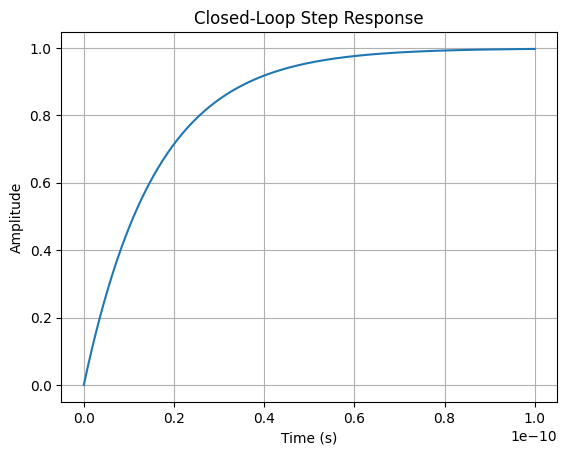

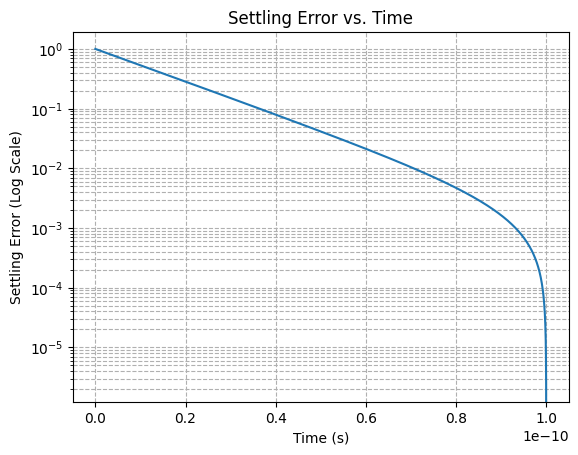

[3.63872774554911e-11, 7.059411882376476e-11, 9.31986397279456e-11]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control

wp1 = 2 * np.pi * 10e6 
A0 = 999
t = np.linspace(0, 100e-12, num=5000)
s = control.TransferFunction.s
AOL = A0 / (1 + s/wp1)
ACL = control.feedback(AOL, 1)
t, y = control.step_response(ACL, t)

# Plot the step response
plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Closed-Loop Step Response')
plt.grid(True)
plt.show()

# Calculate and plot the settling error vs time in log scale
final_value = y[-1]
error = np.abs(1 - y / final_value)
plt.figure()
plt.semilogy(t, error)
plt.xlabel('Time (s)')
plt.ylabel('Settling Error (Log Scale)')
plt.title('Settling Error vs. Time')
plt.grid(True, which="both", ls="--")
plt.show()


settling_range = [0.10, 0.01, 0.001] 
settling_times = []

for e in settling_range:
    settling_time_index = np.where(error < e)[0]
    settling_times.append(t[settling_time_index[0]])

settling_times

In [16]:
np.radians(180)

3.141592653589793

In [33]:
freqs = np.logspace(np.log10(wp1*A0) - 2, np.log10(wp1*A0) + 2, num=1000)

In [34]:
freqs

array([6.28318531e+09, 6.34138137e+09, 6.40011645e+09, 6.45939556e+09,
       6.51922371e+09, 6.57960601e+09, 6.64054757e+09, 6.70205359e+09,
       6.76412929e+09, 6.82677995e+09, 6.89001089e+09, 6.95382749e+09,
       7.01823517e+09, 7.08323940e+09, 7.14884572e+09, 7.21505969e+09,
       7.28188695e+09, 7.34933318e+09, 7.41740411e+09, 7.48610552e+09,
       7.55544326e+09, 7.62542322e+09, 7.69605134e+09, 7.76733364e+09,
       7.83927617e+09, 7.91188504e+09, 7.98516643e+09, 8.05912657e+09,
       8.13377174e+09, 8.20910829e+09, 8.28514261e+09, 8.36188119e+09,
       8.43933053e+09, 8.51749722e+09, 8.59638791e+09, 8.67600929e+09,
       8.75636815e+09, 8.83747130e+09, 8.91932565e+09, 9.00193815e+09,
       9.08531582e+09, 9.16946575e+09, 9.25439509e+09, 9.34011106e+09,
       9.42662096e+09, 9.51393212e+09, 9.60205198e+09, 9.69098802e+09,
       9.78074780e+09, 9.87133895e+09, 9.96276918e+09, 1.00550463e+10,
       1.01481780e+10, 1.02421724e+10, 1.03370373e+10, 1.04327809e+10,
      

In [38]:
_, pm, _, wcp = control.margin(AOL)
print(pm)
index([])

90.00572957796084


pm_target: 30
second pole: 181819863609.97586
pm_target: 45
second pole: 444661691827.6058
pm_target: 60
second pole: 938326626647.7264


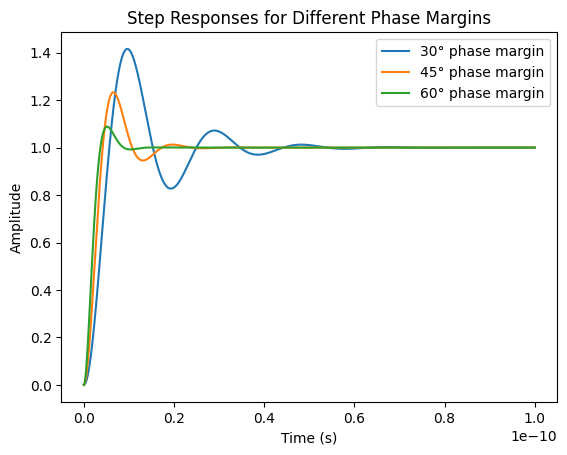

In [44]:
import control
import numpy as np
import matplotlib.pyplot as plt

def find_closest(my_list, n):
    return min(my_list, key=lambda x: abs(x-n))

# Given values
wp1 = 2 * np.pi * 10e6 
A0 = 1e4  
t = np.linspace(0, 100e-12, num=5000)


s = control.TransferFunction.s
AOL = A0 / (1 + s/wp1)


phase_margins = [30, 45, 60]


plt.figure()

for pm in phase_margins:
    _, _, _, wcp = control.margin(AOL)

    def find_nd_pole(pm_target):
        phase_margin_list = []
        freqs = np.logspace(np.log10(wcp) - 2, np.log10(wcp) + 2, num=1000)
        for f in freqs:
            AOL_nd = AOL * (1 / (1 + s/f))
            _, phase_margin, _, _ = control.margin(AOL_nd)
            phase_margin_list.append(phase_margin)

        closest = find_closest(phase_margin_list, pm_target)
        closest_index = phase_margin_list.index(closest)
        print("pm_target:", pm_target)
        print("second pole:", freqs[closest_index])
         
        return freqs[closest_index]

    wp2 = find_nd_pole(pm)

    AOL_nd = AOL * (1 / (1 + s/wp2))
    
    ACL = AOL_nd / (1 + AOL_nd)

    t, y = control.step_response(ACL, t)

    plt.plot(t, y, label=f'{pm}° phase margin')

# Finalize plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Step Responses for Different Phase Margins')
plt.legend()
plt.show()


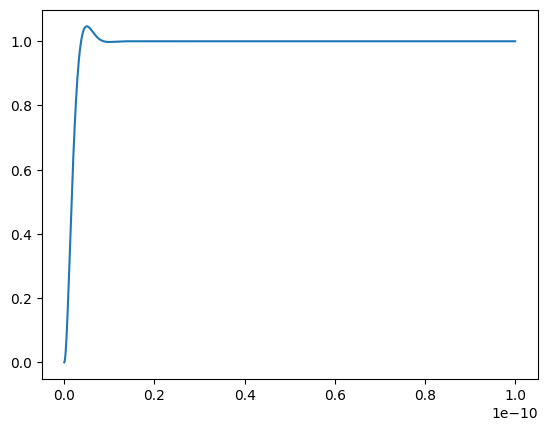

In [93]:
import control
import numpy as np


wp1 = 2 * np.pi * 10e6  
A0 = 1e4
s = control.TransferFunction.s
AOL = A0 / (1 + s/wp1)


error_margin = 0.1

phase_margins = np.linspace(10, 80, 71) 

t_optim = 0
y_optim = 0

def find_nd_pole(AOL, pm_target):
    phase_margin_list = []
    _, _, _, wcp = control.margin(AOL)
    freqs = np.logspace(np.log10(wcp) - 2, np.log10(wcp) + 2, num=1000)
    for f in freqs:
        AOL_nd = AOL * (1 / (1 + s/f))
        _, phase_margin, _, _ = control.margin(AOL_nd)
        phase_margin_list.append(phase_margin)

    closest = find_closest(phase_margin_list, pm_target)
    closest_index = phase_margin_list.index(closest)

    return freqs[closest_index]

best_settling_time = 1
best_phase_margin = 1
times = []

for pm in phase_margins:

    wp2 = find_nd_pole(AOL, pm)
    # if wp2 is None:
    #     continue
    

    AOL_nd = AOL * (1 / (1 + s/wp2))

    ACL = AOL_nd / (1 + AOL_nd)
    
    t = np.linspace(0, 1e-10, num=1000)
    t, y = control.step_response(ACL, t)
    
    final_value = y[-1]
    error = np.abs(1 - y / final_value)

    
    settling_time_index = None
    for i in range(len(error) - 1, -1, -1):
        if error[i] >= error_margin:
            if i < len(error) - 1:
                settling_time_index = i + 1
                settling_time = t[settling_time_index]
            break
            

    if settling_time < best_settling_time:
        best_settling_time = settling_time
        best_phase_margin = pm
        t_optim = t
        y_optim = y
        times.append(best_settling_time)
        
    # print("settling_time_index", settling_time_index)
    # print("settling_time", settling_time)
    # print("pm", pm)
plt.plot(t_optim, y_optim)

    

In [94]:
best_phase_margin

65.0

In [95]:
pm

80.0

In [96]:
best_settling_time


3.003003003003003e-12

In [77]:
len(y)

100

In [55]:
y.shape

(100,)